In [1]:
%load_ext autoreload
%autoreload 2
from Levenshtein import distance, hamming
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm

from datasets import AnnotatedSokobanDataset

In [2]:
data_dir = os.path.join("./data", "boxoban-medium", "train")
all_levels = []

level_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith(".txt")]
for file in level_files:
    with open(file, "r") as f:

        # Split into individual levels
        raw_levels = f.read().split("; ")

        # Remove the first line of each level, which just contains the level number, and replace spaces with dashes
        all_levels += [level[level.find("\n")+1:].strip().replace(" ", "-") for level in raw_levels if level != ""]

In [4]:
MIN_EDIT_DISTANCE = float('inf')
MIN_HAMMING_DISTANCE = float('inf')
edit_dists = []
hamming_dists = []

for i in tqdm(range(100), desc="Sampling levels"):
    base_level = random.choice(all_levels)

    for level in all_levels:
        edit_dist = distance(base_level, level)
        hamming_dist = hamming(base_level, level)

        if edit_dist != 0: edit_dists.append(edit_dist)
        if hamming_dist != 0: hamming_dists.append(hamming_dist)

    MIN_EDIT_DISTANCE = min(MIN_EDIT_DISTANCE, min(edit_dists))
    MIN_HAMMING_DISTANCE = min(MIN_HAMMING_DISTANCE, min(hamming_dists))

print(f"Minimum edit distance: {MIN_EDIT_DISTANCE}")
print(f"Minimum hamming distance: {MIN_HAMMING_DISTANCE}")

Sampling levels: 100%|██████████| 100/100 [02:28<00:00,  1.48s/it]

Minimum edit distance: 3
Minimum hamming distance: 3


Min / Max / Mean: 11 / 58 / 38.27896444444445


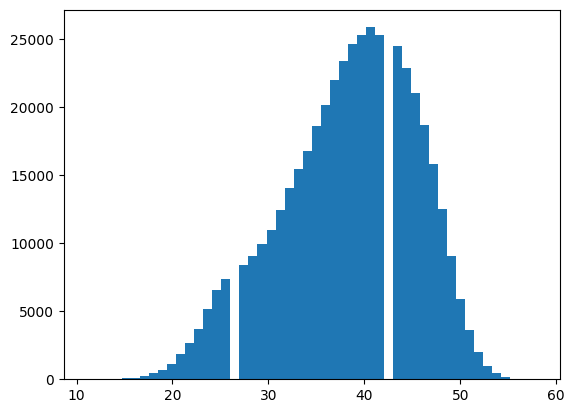

In [12]:
i = 50

sample = hamming_dists[i*450000:(i+1)*450000]
print(f"Min / Max / Mean: {min(sample)} / {max(sample)} / {sum(sample) / len(sample)}")
plt.hist(sample, bins=50)
plt.show()

In [10]:
k = 0

for k in range(0, 1000, 100):
    levels = all_levels[k:k+100]
    diversity = AnnotatedSokobanDataset.get_diversity(None, levels, threshold=30)

    # print(f"Diversity: {diversity}")

Number of edges: 4426


KeyboardInterrupt: 